In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt

import seaborn as sn


C:\Users\nguye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
heart_data = pd.read_csv('C:/Users/nguye/Documents/kaggle/input/heart-disease-uci/heart.csv')

<Axes: xlabel='cp', ylabel='age'>

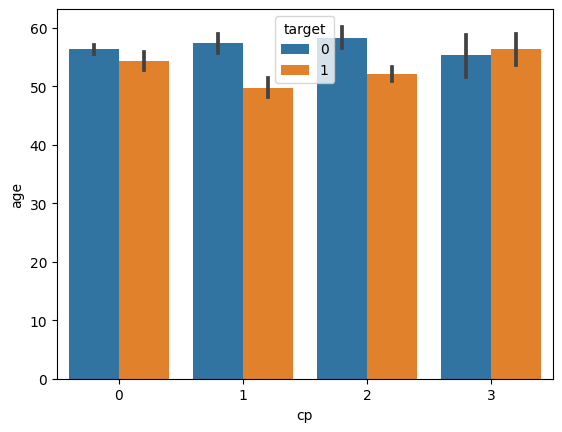

In [19]:
sn.barplot(y='age',x='cp',data=heart_data,hue='target')

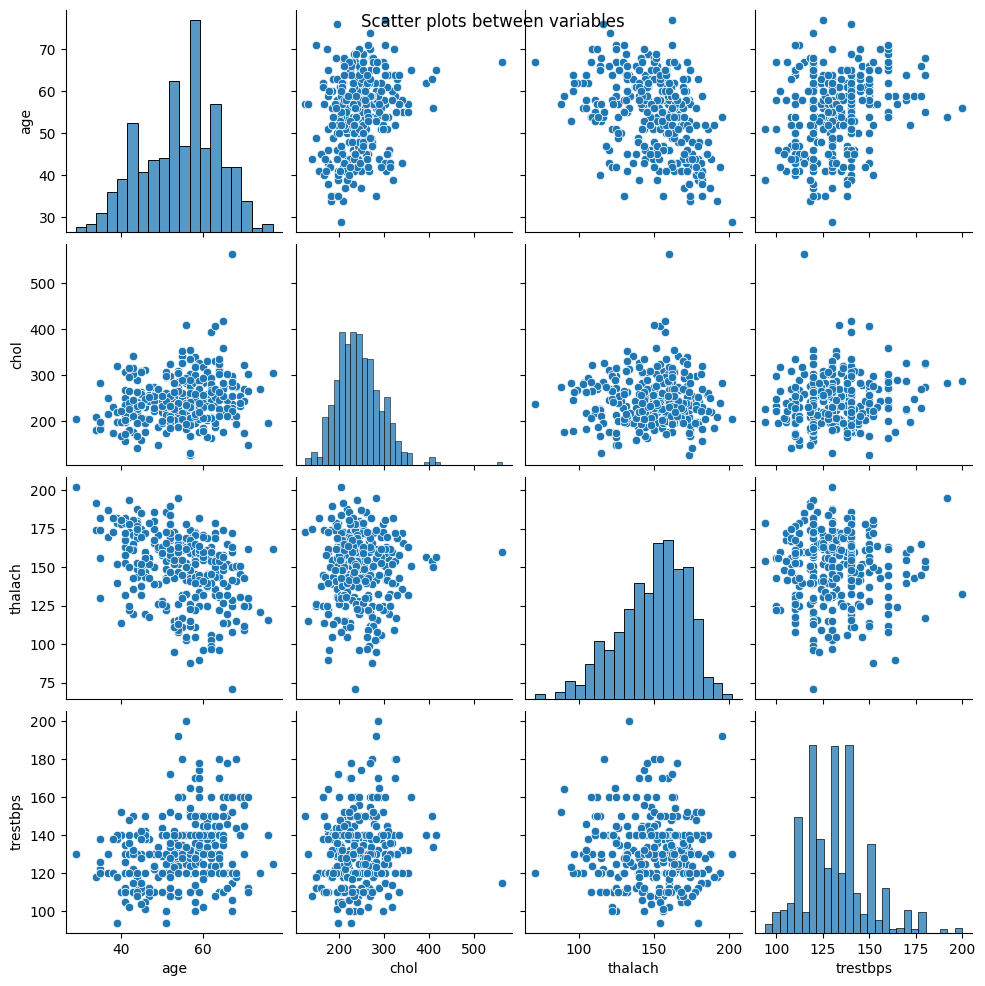

In [21]:
sn.pairplot(heart_data[['age', 'chol', 'thalach', 'trestbps']])
plt.suptitle('Scatter plots between variables')
plt.show()

In [3]:
y = heart_data["target"]
X = heart_data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix on testing set")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier on testing set:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix on testing set
[[84 14]
 [10 97]]


Accuracy of K-NeighborsClassifier on testing set: 88.29268292682927 

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        98
           1       0.87      0.91      0.89       107

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



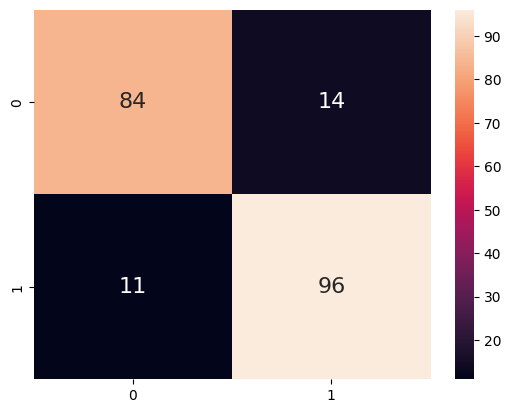

In [17]:
sn.heatmap(knn_conf_matrix, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [14]:
knn_predicted_train = knn.predict(X_train)
knn_conf_matrix_train = confusion_matrix(y_train, knn_predicted_train)
knn_acc_score_train = accuracy_score(y_train, knn_predicted_train)
print("confusion matrix on training set")
print(knn_conf_matrix_train)
print("\n")
print("Accuracy of K-NeighborsClassifier on training set:", knn_acc_score_train * 100, '\n')
print("Classification Report on training set:")
print(classification_report(y_train, knn_predicted_train))

confusion matrix on training set
[[343  58]
 [ 49 370]]


Accuracy of K-NeighborsClassifier on training set: 86.95121951219512 

Classification Report on training set:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       401
           1       0.86      0.88      0.87       419

    accuracy                           0.87       820
   macro avg       0.87      0.87      0.87       820
weighted avg       0.87      0.87      0.87       820



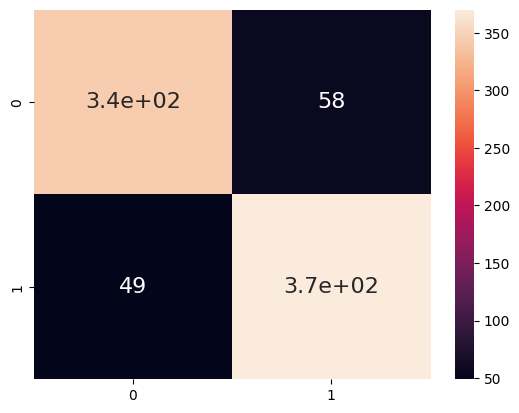

In [15]:
sn.heatmap(knn_conf_matrix_train, annot=True, annot_kws={"size": 16}) # font size

plt.show()